# The z-Distribution
<hr style="border: 1px solid #E491C9;">

<b>Desiree Valois</b>
<br>Computer Engineer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv(r'dataset/transformer-voltage.csv',
                delimiter=",",
                index_col='Sample')
df

,Voltage
Sample,
1,117.0
2,118.3
3,119.5
4,119.5
5,119.6
6,119.6
7,119.7
8,119.7
9,119.7


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 30 entries, 1 to 30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Voltage  30 non-null     float64
dtypes: float64(1)
memory usage: 372.0 bytes


In [4]:
df.describe()

,Voltage
count,30.000000
mean,120.290000
std,1.243285
min,117.000000
25%,119.700000
50%,120.100000
75%,120.500000
max,123.800000


In [5]:
alpha = 0.05
z_critical = stats.norm.ppf(1-alpha/2)
z_critical

np.float64(1.959963984540054)

In [6]:
pop_std = 5

ci_lower, ci_upper = stats.norm.interval(
    confidence=0.95,
    loc=df['Voltage'].mean(),
    scale=pop_std/np.sqrt(df['Voltage'].count())
)

print(f"Confidence Interval = [{ci_lower:.2f}, {ci_upper:.2f}]")

Confidence Interval = [118.50, 122.08]


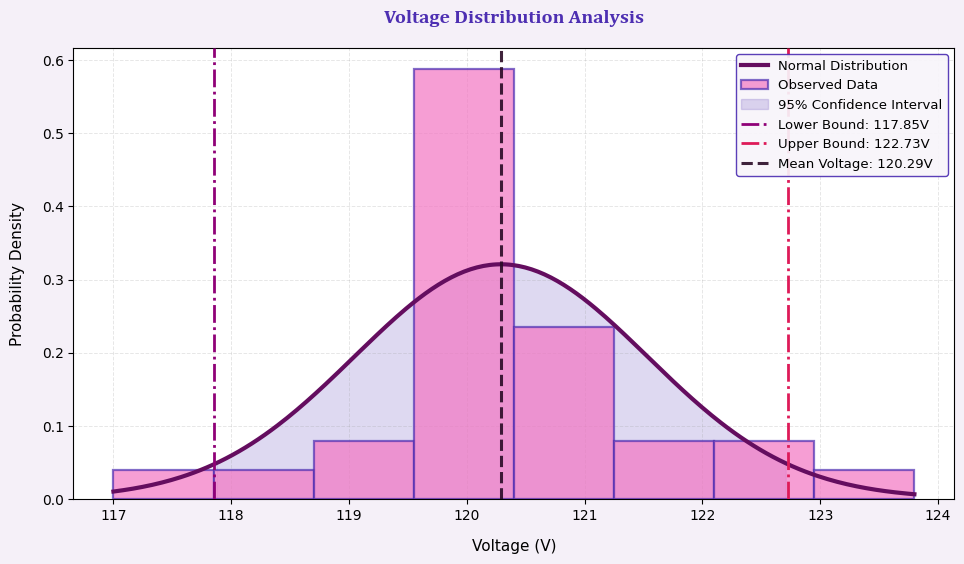

In [7]:
mean = df['Voltage'].mean()
std = df['Voltage'].std(ddof=1)

x_min = df['Voltage'].min()
x_max = df['Voltage'].max()

x = np.linspace(x_min, x_max, 250)
p = stats.norm.pdf(x, mean, std)

confidence_level = 0.95
z = stats.norm.ppf((1 + confidence_level) / 2)

ci_lower = mean - z * std
ci_upper = mean + z * std

plt.figure(figsize=(10, 6), facecolor='#F5F0F8')

plt.plot(
    x, p,
    color="#640D5F",
    linewidth=3.0,
    label="Normal Distribution",
    zorder=3
)

plt.hist(
    df['Voltage'],
    bins=8,
    density=True,
    alpha=0.7,
    color="#F375C2",
    edgecolor="#4D2FB2",
    linewidth=1.6,
    label="Observed Data",
    zorder=2
)

plt.fill_between(
    x, p,
    where=(x >= ci_lower) & (x <= ci_upper),
    color="#4D2FB2",
    alpha=0.18,
    label=f"{confidence_level*100:.0f}% Confidence Interval"
)

plt.axvline(
    x=ci_lower,
    color="#8F0177",
    linestyle="-.",
    linewidth=2.0,
    label=f"Lower Bound: {ci_lower:.2f}V",
    zorder=4
)

plt.axvline(
    x=ci_upper,
    color="#DE1A58",
    linestyle="-.",
    linewidth=2.0,
    label=f"Upper Bound: {ci_upper:.2f}V",
    zorder=4
)

plt.axvline(
    x=mean,
    color="#2A0B26",
    linestyle="--",
    linewidth=2.2,
    alpha=0.9,
    label=f"Mean Voltage: {mean:.2f}V",
    zorder=4
)

plt.title(
    "Voltage Distribution Analysis",
    font="Cambria",
    fontsize=14,
    pad=18,
    weight='bold',
    color="#4D2FB2"
)

plt.xlabel(
    "Voltage (V)",
    fontsize=11,
    labelpad=12,
    fontweight='medium'
)

plt.ylabel(
    "Probability Density",
    fontsize=11,
    labelpad=12,
    fontweight='medium'
)

plt.grid(
    True,
    alpha=0.25,
    linestyle='--',
    linewidth=0.7,
    color='#A0A0A0'
)

plt.legend(
    frameon=True,
    framealpha=0.92,
    edgecolor="#4D2FB2",
    fontsize=9.5,
    loc='upper right',
    facecolor='#F8F5FA'
)

plt.tight_layout(pad=2.0)
plt.show()